## Лабораторная работа № 3
### Андрюшина Мария, 932001
### Аренда велосипедов

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Работа с данными

In [3]:
df = pd.read_csv('hour.csv', index_col = 0)
df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17379 entries, 1 to 17379
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 2.3+ MB


In [5]:
df.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [6]:
df.describe(include=[object])

,dteday
count,17379
unique,731
top,2011-01-01
freq,24


Пропущенных значений нет

In [7]:
df.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Извлечём день из признака dteday:

In [8]:
df['dteday'] = pd.to_datetime(df['dteday'])
df['day'] = df['dteday'].dt.day
df = df.drop(['dteday'], axis=1)
df

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
instant,,,,,,,,,,,,,,,,
1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,1
2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,1
3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,1
4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,1
5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17375,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,31
17376,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,31
17377,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,31


In [10]:
df.columns

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'day'],
      dtype='object')

Возьмём для обучения все признаки, кроме casual и registered, так как они являются производными от таргета и не входят в основной набор данных:

In [46]:
features = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'day']

In [47]:
df1 = df.copy()
df1 = df1[features]
df1

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
instant,,,,,,,,,,,,,,
1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16,1
2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40,1
3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32,1
4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13,1
5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17375,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119,31
17376,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89,31
17377,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90,31


Обработаем данные в столбцах season, hr и weathersit:

In [48]:
df1 = pd.get_dummies(df1, columns = ['season', 'hr', 'weathersit'], dtype=float)
df1.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,...,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23,weathersit_1,weathersit_2,weathersit_3,weathersit_4
instant,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,6,0,0.24,0.2879,0.81,0.0,16,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0,1,0,6,0,0.22,0.2727,0.80,0.0,40,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0,1,0,6,0,0.22,0.2727,0.80,0.0,32,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0,1,0,6,0,0.24,0.2879,0.75,0.0,13,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0,1,0,6,0,0.24,0.2879,0.75,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [49]:
X = df1.drop(['cnt'],axis=1)
y = df1['cnt']

In [50]:
min_max_scaler = MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)

Разделим датасет на две части: тренировочную (70%) и тестовую (30%):

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=77)

### Linear Regression

По умолчанию поставим n_jobs = -1 для распараллеливания работы. Подберем параметры fit_intercept, copy_X и positive:

In [85]:
parameters = {'fit_intercept': [True, False], 'copy_X': [True, False], 'positive':  [True, False]}
model = LinearRegression(n_jobs = -1)
gridForest = GridSearchCV(estimator=model, param_grid=parameters)
gridForest.fit(X_train, y_train)
print('Best score:', round(gridForest.best_score_,3))
print('Best model:', gridForest.best_estimator_)

Best score: 0.684
Best model: LinearRegression(n_jobs=-1)


Оптимальные значения параметров: fit_intercept = True, copy_X = True, positive = False. Эти значения стоят по умолчанию.

Построим модель LinearRegression с учетом подобранных параметров:

In [86]:
linear_model = LinearRegression(n_jobs = -1)
linear_model.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

Выводим метрики:

In [87]:
preds = linear_model.predict(X_test)
print('Linear Regression Estimation:')
print('R2-score:',round(r2_score(y_test,preds),3))
print('MSE:',round(mean_squared_error(y_test,preds),3))
print('MAE:',round(mean_absolute_error(y_test,preds),3))

Linear Regression Estimation:
R2-score: 0.669
MSE: 10725.116
MAE: 75.819


Получим значимость признаков:

In [88]:
print('weight_0 =',np.round(linear_model.intercept_,3))
print('weights = ',np.round(linear_model.coef_,3))

weight_0 = 1447911195504894.8
weights =  [ 8.67030000e+01 -1.54650000e+01 -2.35950000e+01  1.37010000e+01
  1.67100000e+00  1.19168000e+02  1.31228000e+02 -6.86540000e+01
 -2.76800000e+01 -5.88800000e+00 -3.30082474e+15 -3.30082474e+15
 -3.30082474e+15 -3.30082474e+15  1.61895837e+15  1.61895837e+15
  1.61895837e+15  1.61895837e+15  1.61895837e+15  1.61895837e+15
  1.61895837e+15  1.61895837e+15  1.61895837e+15  1.61895837e+15
  1.61895837e+15  1.61895837e+15  1.61895837e+15  1.61895837e+15
  1.61895837e+15  1.61895837e+15  1.61895837e+15  1.61895837e+15
  1.61895837e+15  1.61895837e+15  1.61895837e+15  1.61895837e+15
  1.61895837e+15  1.61895837e+15  2.33955172e+14  2.33955172e+14
  2.33955172e+14  2.33955172e+14]


### Вывод

При создании модели LinearRegression использовались следующие гиперпараметры: n_jobs = -1. На тестовой выборке мы получили R2-score: 0.669, MSE: 10725.116, MAE: 75.819.

### Polynomial Features

Для PolynomialFeatures возьмём degree, равное 2, так как модель обучается на 42 признаках и при большем значении degree может не хватить вычислительных мощностей.

In [57]:
quadratic = PolynomialFeatures(degree = 2)
X_train_quadratic = quadratic.fit_transform(X_train)
X_test_quadratic = quadratic.transform(X_test)

In [58]:
print(X_train.shape)
print(X_train_quadratic.shape)

(12165, 42)
(12165, 946)


Подберем параметры fit_intercept, copy_X и positive:

In [61]:
parameters = {'fit_intercept': [True, False], 'copy_X': [True, False], 'positive':  [True, False]}
model = LinearRegression(n_jobs = -1)
gridForest = GridSearchCV(estimator=model, param_grid=parameters)
gridForest.fit(X_train_quadratic, y_train)
print('Best score:', round(gridForest.best_score_,3))
print('Best model:', gridForest.best_estimator_)

Best score: 0.816
Best model: LinearRegression(fit_intercept=False, n_jobs=-1, positive=True)


Оптимальные значения параметров: fit_intercept = False, copy_X = True, positive = True.

Построим модель LinearRegression с учетом подобранных параметров:

In [62]:
quadratic_model = LinearRegression(fit_intercept=False, n_jobs=-1, positive=True)
quadratic_model.fit(X_train_quadratic,y_train)

LinearRegression(fit_intercept=False, n_jobs=-1, positive=True)

Выводим метрики:

In [63]:
preds = quadratic_model.predict(X_test_cube)
print('QuadraticCubic Regression Estimation:')
print('R2-score:',round(r2_score(y_test,preds),3))
print('MSE:',round(mean_squared_error(y_test,preds),3))
print('MAE:',round(mean_absolute_error(y_test,preds),3))

Cubic Regression Estimation:
R2-score: 0.813
MSE: 6067.548
MAE: 53.043


Получим значимость признаков:

In [64]:
print('weight_0 =', np.round(quadratic_model.intercept_, 3))
print('weights = ', np.round(quadratic_model.coef_, 3))

weight_0 = 0.0
weights =  [  0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.     48.898   0.      0.      0.      0.      0.
   1.997   0.      4.114   0.      0.      0.      0.      0.      0.
   1.208  56.291 147.428  79.368  50.181  70.454  94.069  74.297  77.136
  84.277 111.052 161.514 146.18  103.702  55.962  33.215  19.507   2.527
   4.247   0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.     13.322   0.54   24.931   0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.     

### Вывод

При создании модели LinearRegression с PolynomialFeatures использовались следующие гиперпараметры: fit_intercept=False, n_jobs=-1, positive=True. На тестовой выборке мы получили R2-score: 0.813, MSE: 6067.548, MAE: 53.043.

### Random Forest

In [65]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3,random_state=77)

Подберем параметры n_estimators, max_features и max_depth:

In [68]:
parameters = {'n_estimators': [200, 300, 400],
              'max_features': [5, 15, 30, 40], 'max_depth': [3, 7, 9, 12]}
model = RandomForestRegressor(n_jobs = -1, random_state = 77)
gridForest = GridSearchCV(estimator=model, param_grid=parameters)
gridForest.fit(X_train, y_train)
print('Best score:', round(gridForest.best_score_,3))
print('Best model:', gridForest.best_estimator_)

Best score: 0.822
Best model: RandomForestRegressor(max_depth=12, max_features=30, n_estimators=300,
                      n_jobs=-1, random_state=77)


Оптимальные значения параметров: n_estimators = 300, max_features = 30, max_depth = 12.

Построим модель RandomForestRegressor с учетом подобранных параметров:

In [69]:
forest_model = RandomForestRegressor(max_depth=12, max_features=30, n_estimators=300, n_jobs=-1, random_state=77)
forest_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=12, max_features=30, n_estimators=300,
                      n_jobs=-1, random_state=77)

Выводим метрики:

In [70]:
preds = forest_model.predict(X_test)
print('Random Forest Regression Estimation:')
print('R2-score:',round(r2_score(y_test,preds),3))
print('MSE:',round(mean_squared_error(y_test,preds),3))
print('MAE:',round(mean_absolute_error(y_test,preds),3))

Random Forest Regression Estimation:
R2-score: 0.831
MSE: 5475.327
MAE: 53.644


Получим значимость признаков:

In [71]:
weights = pd.DataFrame({'column': X_train.columns,
                        'weight': forest_model.feature_importances_})
weights.sort_values(by='weight', ascending=False).head()

,column,weight
6,atemp,0.157266
31,hr_17,0.117113
32,hr_18,0.092182
7,hum,0.088267
0,yr,0.088178


<BarContainer object of 42 artists>

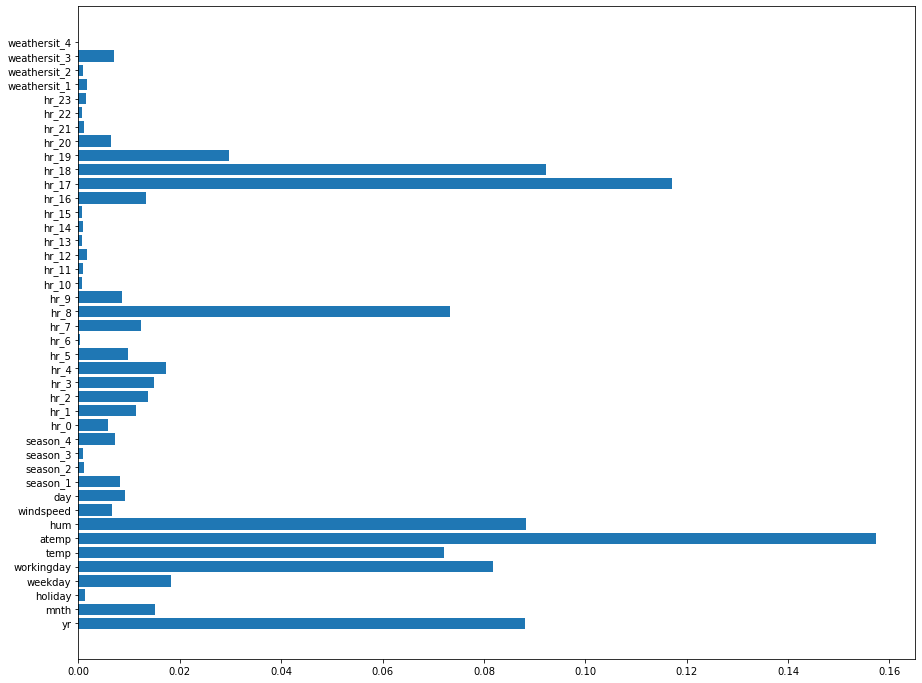

In [72]:
plt.figure(figsize=(15,12))
plt.barh(y=weights['column'], width=weights['weight'])

Визуализируем несколько деревьев решений:

In [73]:
tree_0 = forest_model.estimators_[0]

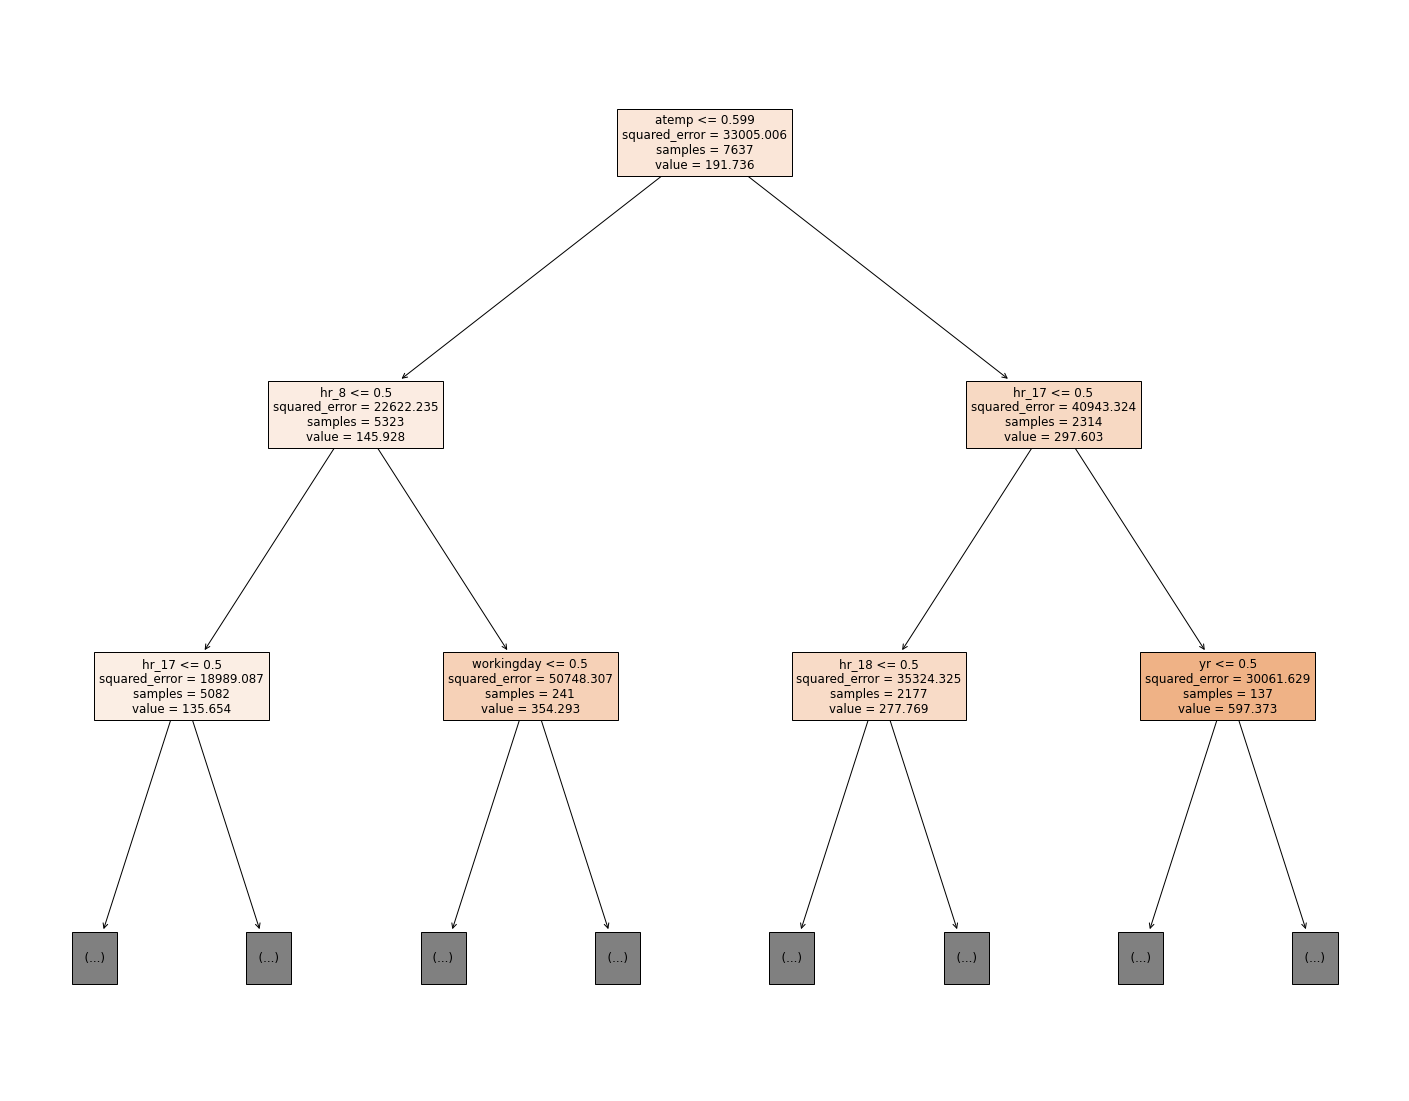

In [74]:
plt.figure(figsize=(25,20))
tree.plot_tree(tree_0, feature_names=X_train.columns, max_depth = 2, filled = True)

plt.show()

In [75]:
tree_1 = forest_model.estimators_[1]

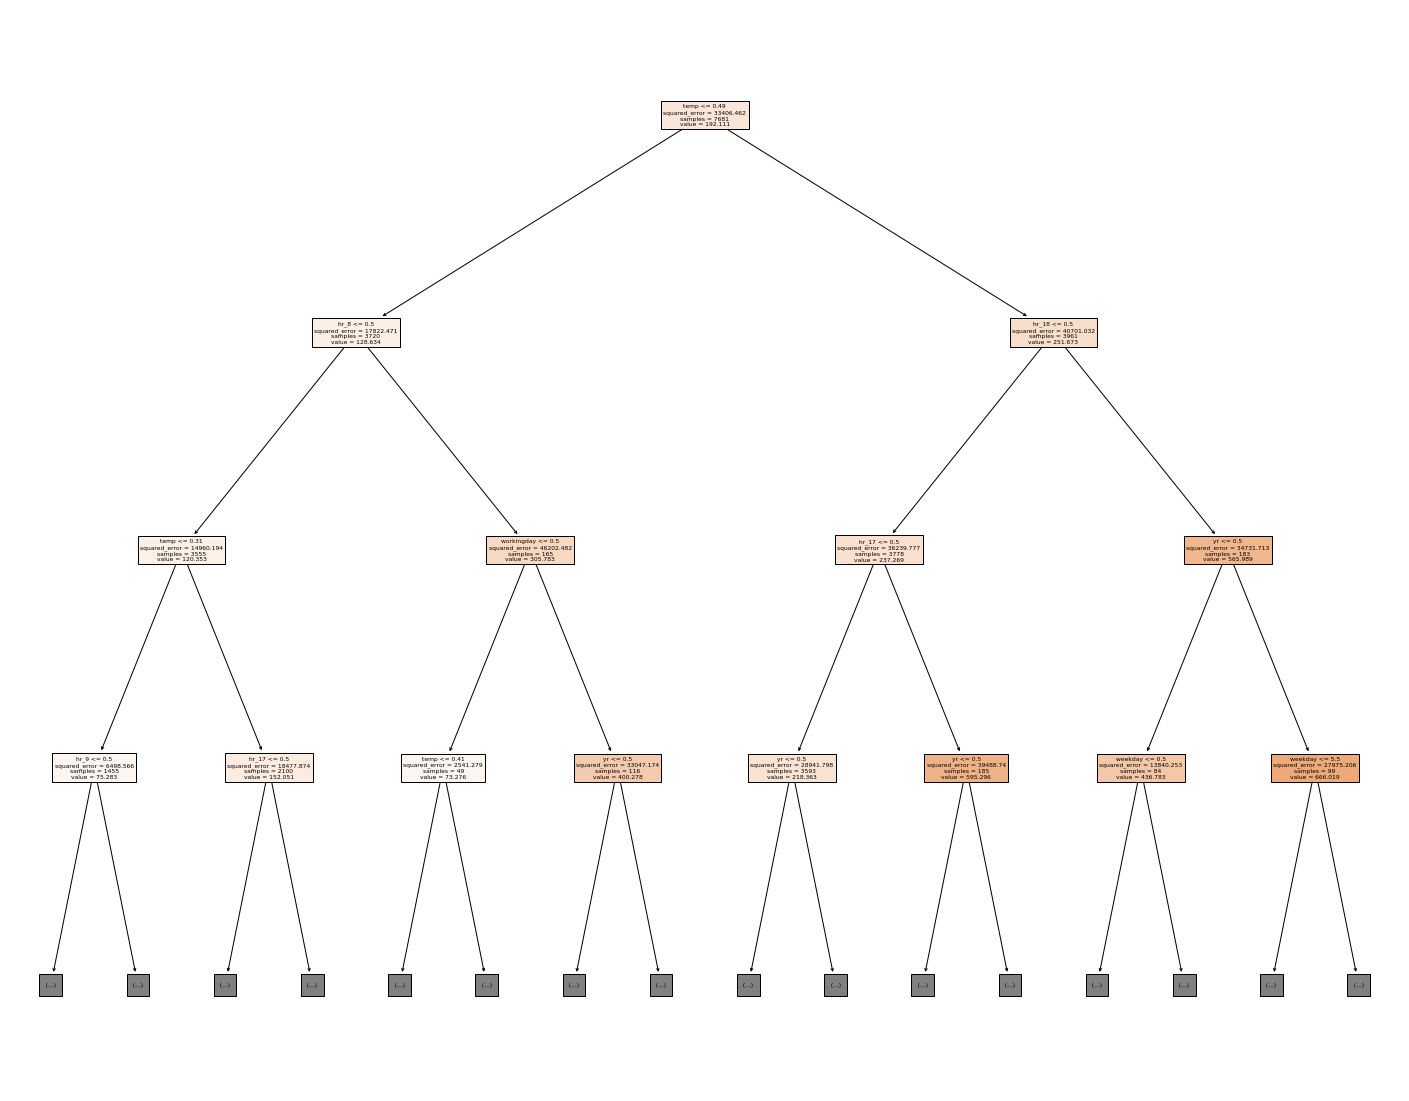

In [76]:
plt.figure(figsize=(25,20))
tree.plot_tree(tree_1, feature_names=X_train.columns, max_depth = 3, filled = True)

plt.show()

### Вывод

При создании модели RandomForestRegressor использовались следующие гиперпараметры: max_depth=12, max_features=30, n_estimators=300, n_jobs=-1, random_state=77. На тестовой выборке мы получили R2-score: 0.831, MSE: 5475.327, MAE: 53.644.

При анализе значимости признаков мы выяснили, что наибольшее влияние на предсказание таргета оказывают следующие признаки: atemp, hr_17, hr_18, hum, yr.	

### Gradient Boosting

In [77]:
min_max_scaler = MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)

In [78]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled, y, test_size=0.3,random_state=77)

Подберем параметры loss и learning_rate:

In [79]:
parameters = {'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'],
              'learning_rate': [0.01, 0.1, 0.5, 1]}
model = GradientBoostingRegressor(random_state = 77)
gridForest = GridSearchCV(estimator=model, param_grid=parameters)
gridForest.fit(X_train, y_train)
print('Best score:', round(gridForest.best_score_,3))
print('Best model:', gridForest.best_estimator_)

Best score: 0.91
Best model: GradientBoostingRegressor(learning_rate=0.5, random_state=77)


Оптимальные значения параметра learning_rate = 0.5.

Подберем параметры n_estimators, max_features и max_depth:

In [80]:
parameters = {'n_estimators': [200, 300, 400],
              'max_features': [5, 15, 30, 40], 'max_depth': [3, 7, 9, 12]}
model = GradientBoostingRegressor(learning_rate=0.5, random_state = 77)
gridForest = GridSearchCV(estimator=model, param_grid=parameters)
gridForest.fit(X_train, y_train)
print('Best score:', round(gridForest.best_score_,3))
print('Best model:', gridForest.best_estimator_)

Best score: 0.93
Best model: GradientBoostingRegressor(learning_rate=0.5, max_features=40, n_estimators=400,
                          random_state=77)


Оптимальные значения параметров: n_estimators = 400, max_features = 30.

Построим модель GradientBoostingRegressor с учетом подобранных параметров:

In [81]:
gradient_model = GradientBoostingRegressor(learning_rate=0.5, max_features=40, n_estimators=400, random_state=77)
gradient_model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.5, max_features=40, n_estimators=400,
                          random_state=77)

Выводим метрики:

In [94]:
preds = gradient_model.predict(X_test)
print('Gradient Boosting Regression Estimation:')
print('R2-score:',round(r2_score(y_test,preds),3))
print('MSE:',round(mean_squared_error(y_test,preds),3))
print('MAE:',round(mean_absolute_error(y_test,preds),3))

Gradient Boosting Regression Estimation:
R2-score: 0.931
MSE: 2248.334
MAE: 31.384


Получим значимость признаков:

<AxesSubplot:>

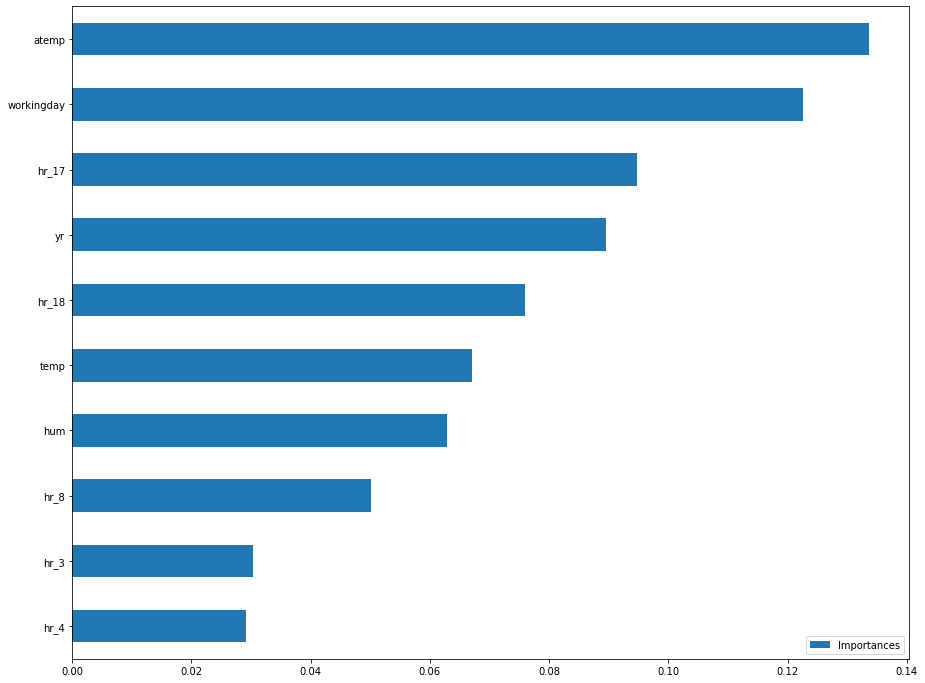

In [83]:
feature_importances = gradient_model.feature_importances_
feature_importances_df = pd.DataFrame(feature_importances,
                                      columns=['Importances'],
                                      index = X.columns).sort_values('Importances', ascending=True)
feature_importances_df[-10:].plot.barh(figsize=(15,12))

### Вывод

При создании модели GradientBoostingRegressor использовались следующие гиперпараметры: learning_rate=0.5, max_features=40, n_estimators=400, random_state=77. На тестовой выборке мы получили R2-score: 0.931, MSE: 2248.334, MAE: 31.384.

При анализе значимости признаков мы выяснили, что наибольшее влияние на предсказание таргета оказывают следующие признаки: atemp, workingday, hr_17, yr, hr_18.

### Общий вывод

Лучше всех показала себя модель GradientBoostingRegressor с R2-score = 0.931, MSE = 2248.334, MAE = 31.384.

В моделях RandomForestRegressor и GradientBoostingRegressor были схожие самые значимые признаки (atemp, hr_17, yr, hr_18), но они имели разные веса в каждой модели.